In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns =40

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')


In [2]:
receipts_disposal = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\DataSet-MonthwiseReceiptsDisposal_1.csv")
pendency_stats = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\Dept_stat_receipt_disposal_010112019.csv")
nodal_officers = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\NodalOfficer_Details.csv", encoding = "ISO-8859–1")
registered_users = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\RegisteredUsers.csv", encoding = "ISO-8859–1" )
feedback = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\feedback_details.csv", encoding = "ISO-8859–1")
movement = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\movement_details.csv", encoding = "ISO-8859–1")

E:\The Institution\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("receipts_disposal: ", receipts_disposal.shape)
print("pendency_stats: ", pendency_stats.shape)
print("nodal_officers: ", nodal_officers.shape)
print("registered_users: ", registered_users.shape)
print("feedback:", feedback.shape)
print("movement: ", movement.shape)

receipts_disposal:  (5567, 5)
pendency_stats:  (124, 8)
nodal_officers:  (53164, 10)
registered_users:  (618968, 8)
feedback: (12, 34)
movement:  (10, 29)


In [12]:
#movement

In [11]:
#feedback

In [4]:
receipts_disposal.head()

,org_name,Year,Month,Recetpts,Disposals
0,Central Board of Direct Taxes (Income Tax),2016,1,1600,49
1,Central Board of Direct Taxes (Income Tax),2016,2,2106,207
2,Central Board of Direct Taxes (Income Tax),2016,3,2465,2702
3,Central Board of Direct Taxes (Income Tax),2016,4,1912,1320
4,Central Board of Direct Taxes (Income Tax),2016,5,2797,1588


In [5]:
receipts_disposal = receipts_disposal.rename(columns={"Recetpts":"Receipts"})

In [6]:
receipts_disposal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 5 columns):
org_name     5567 non-null object
Year         5567 non-null int64
Month        5567 non-null int64
Receipts     5567 non-null int64
Disposals    5567 non-null int64
dtypes: int64(4), object(1)
memory usage: 217.6+ KB


In [7]:
receipts_disposal.describe()

,Year,Month,Receipts,Disposals
count,5567.000000,5567.000000,5567.000000,5567.000000
mean,2017.489851,6.391054,837.197773,688.464703
std,1.102636,3.377380,1631.776291,1591.735766
min,2016.000000,1.000000,1.000000,1.000000
25%,2017.000000,3.000000,82.000000,48.000000
50%,2017.000000,6.000000,264.000000,160.000000
75%,2018.000000,9.000000,888.000000,606.500000
max,2019.000000,12.000000,24977.000000,25005.000000


In [8]:
receipts_disposal["Year"].value_counts()

2018    1464
2017    1415
2016    1371
2019    1317
Name: Year, dtype: int64

In [9]:
receipts_disposal["Date"] = pd.to_datetime(receipts_disposal["Year"].astype(str) + "-" + receipts_disposal["Month"].astype(str), format = "%Y-%d")

In [10]:
print(receipts_disposal.dtypes)
receipts_disposal.head()

org_name             object
Year                  int64
Month                 int64
Receipts              int64
Disposals             int64
Date         datetime64[ns]
dtype: object


,org_name,Year,Month,Receipts,Disposals,Date
0,Central Board of Direct Taxes (Income Tax),2016,1,1600,49,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2016,2,2106,207,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2016,3,2465,2702,2016-01-03
3,Central Board of Direct Taxes (Income Tax),2016,4,1912,1320,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2016,5,2797,1588,2016-01-05


In [11]:
receipts_disposal = receipts_disposal.drop(["Year", "Month"],axis=1)

In [12]:
receipts_disposal.head()

,org_name,Receipts,Disposals,Date
0,Central Board of Direct Taxes (Income Tax),1600,49,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2106,207,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2465,2702,2016-01-03
3,Central Board of Direct Taxes (Income Tax),1912,1320,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2797,1588,2016-01-05


In [13]:
receipts_disposal["org_name"].value_counts()

Ministry of Tribal Affairs                            47
Government of Kerala                                  47
Ministry of Skill Development and Entrepreneurship    47
Department of Ex Servicemen Welfare                   47
Department of Rural Development                       47
                                                      ..
Committee on Petitions Rajya Sabha                     7
Department of Fisheries                                3
National Human Rights Commission                       2
National Commission for Scheduled Caste                1
Investment Grievance Redress Cell                      1
Name: org_name, Length: 129, dtype: int64

In [14]:
org_counts = receipts_disposal['org_name'].value_counts()
org_list = org_counts[org_counts == 47].index.tolist()

print(org_list, len(org_list))

['Ministry of Tribal Affairs', 'Government of Kerala', 'Ministry of Skill Development and Entrepreneurship', 'Department of Ex Servicemen Welfare', 'Department of Rural Development', 'Government of Tamil Nadu', 'Unique Identification Authority of India', 'Ministry  of Coal', 'Department of Health Research', 'Department of Agriculture, Cooperation and Farmers Welfare', 'Government of Assam', 'Ministry of Civil Aviation', 'Department of Commerce', 'Department of Higher Education', 'Department of Defence Finance', 'Government of Gujarat', 'Ministry of Corporate Affairs', 'Department of Health & Family Welfare', 'Government of Uttar Pradesh', 'Department of Telecommunications', 'Ministry of Culture', 'Ministry of Water Resources, River Development & Ganga Rejuv', 'Ministry of Petroleum and Natural Gas', 'Ministry of Information and Broadcasting', 'Department of Scientific & Industrial Research', 'Department of Industrial Policy & Promotion', 'Central Board of Indirect Taxes and Customs', '

In [15]:
receipts_disposal = receipts_disposal[receipts_disposal['org_name'].isin(org_list)]

In [16]:
print(receipts_disposal.shape)

(3572, 4)


In [17]:
min_externalaffairs = receipts_disposal[receipts_disposal["org_name"]=="Ministry of External Affairs"]


In [18]:
print(min_externalaffairs.shape)
min_externalaffairs.head()

(47, 4)


,org_name,Receipts,Disposals,Date
4215,Ministry of External Affairs,770,360,2016-01-01
4216,Ministry of External Affairs,862,958,2016-01-02
4217,Ministry of External Affairs,984,913,2016-01-03
4218,Ministry of External Affairs,1034,1098,2016-01-04
4219,Ministry of External Affairs,943,943,2016-01-05


In [20]:
min_externalaffairs_receipts = min_externalaffairs.drop(["Disposals","org_name"],axis=1)
min_externalaffairs_receipts = min_externalaffairs_receipts.set_index("Date")

In [22]:
print(min_externalaffairs_receipts.dtypes)
min_externalaffairs_receipts.head()

Receipts    int64
dtype: object


,Receipts
Date,
2016-01-01,770
2016-01-02,862
2016-01-03,984
2016-01-04,1034
2016-01-05,943


In [39]:
min_externalaffairs_receipts.tail()

,Receipts
Date,
2019-01-07,1115
2019-01-08,1112
2019-01-09,1272
2019-01-10,1174
2019-01-11,30


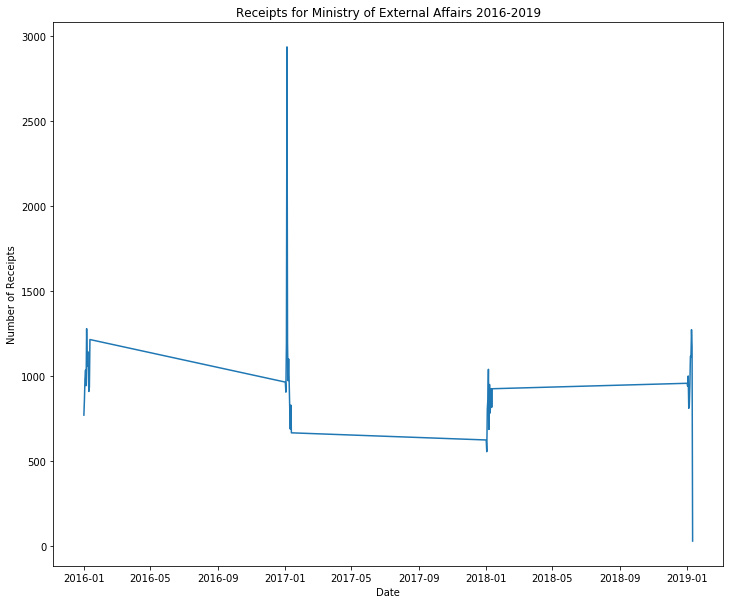

In [24]:
plt.figure(figsize=(12,10))
plt.plot(min_externalaffairs_receipts)
plt.title("Receipts for Ministry of External Affairs 2016-2019")
plt.xlabel("Date")
plt.ylabel("Number of Receipts")
plt.show()

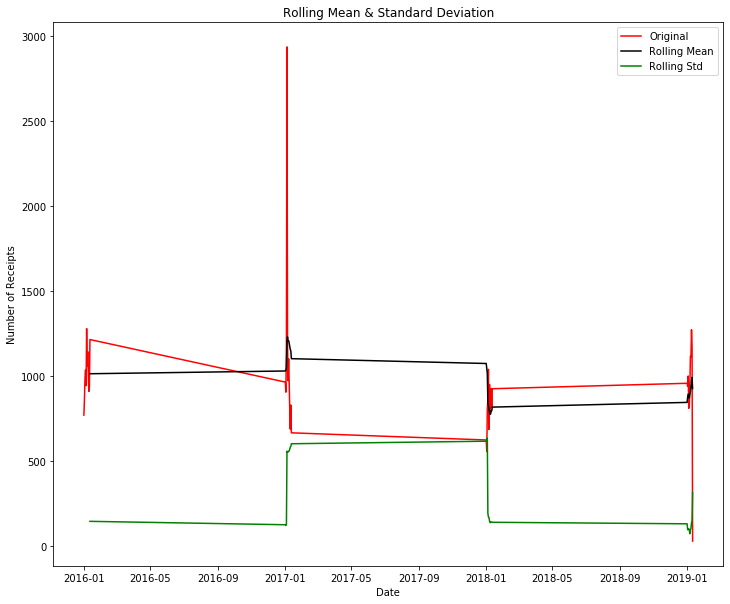

Test statistic:  -4.666048385164025
p-value:  9.741942166579908e-05
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


In [27]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(min_externalaffairs_receipts):
    # Dickey-Fuller test
    result = adfuller(min_externalaffairs_receipts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(min_externalaffairs_receipts):
    #Rolling statistics
    rolmean = min_externalaffairs_receipts.rolling(window=12).mean()
    rolstd = min_externalaffairs_receipts.rolling(window=12).std()
    plt.figure(figsize=(12,10))   
    orig = plt.plot(min_externalaffairs_receipts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Number of Receipts")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(min_externalaffairs_receipts)
check_adfuller(min_externalaffairs_receipts.Receipts)

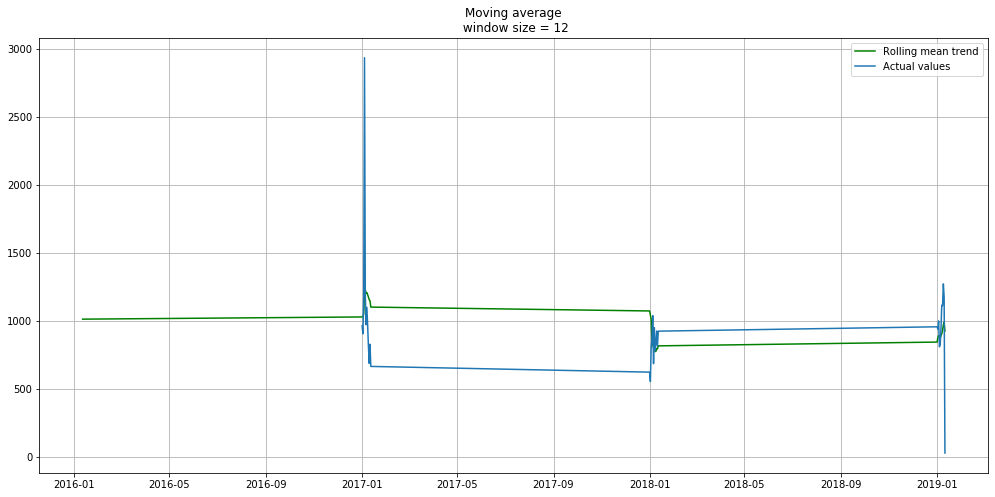

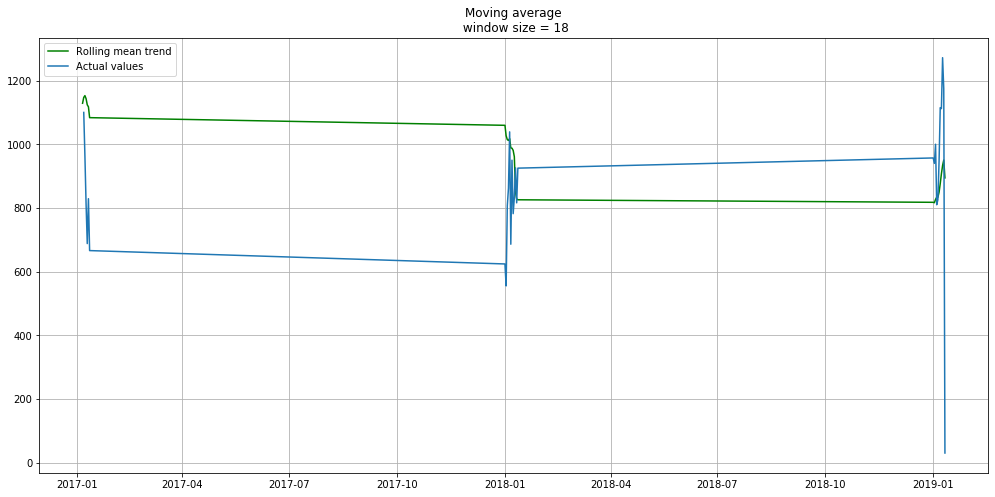

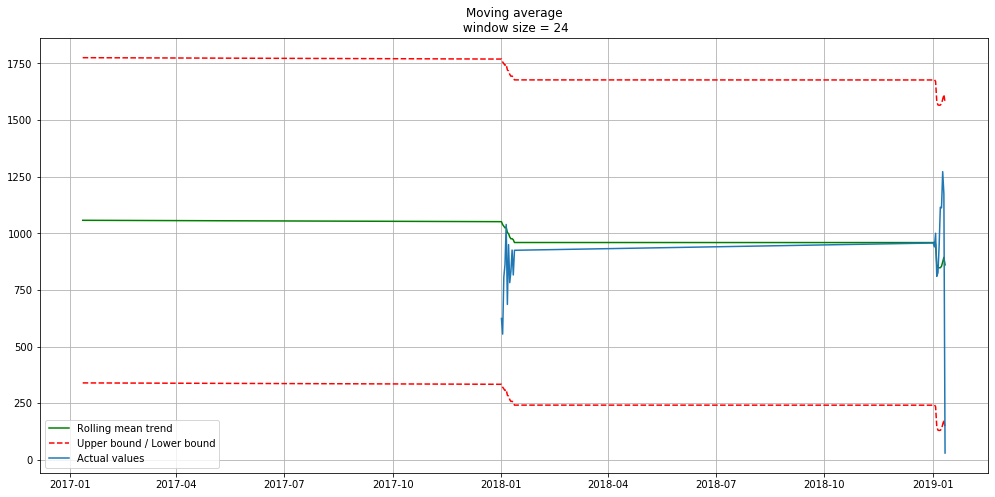

In [53]:
# Moving average method
"""
window_size = 24
moving_avg = min_externalaffairs_receipts.rolling(window_size).mean()
plt.figure(figsize=(12,10))
plt.plot(min_externalaffairs_receipts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Receipts for the Ministry of External Affairs")
plt.xlabel("Date")
plt.ylabel("Number of Receipts")
plt.legend()
plt.show()
"""

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(min_externalaffairs_receipts.Receipts, 12)

#Smooth by the previous month (30 days)
plot_moving_average(min_externalaffairs_receipts.Receipts, 18)

#Smooth by previous quarter (90 days)
plot_moving_average(min_externalaffairs_receipts.Receipts, 24, plot_intervals=True)

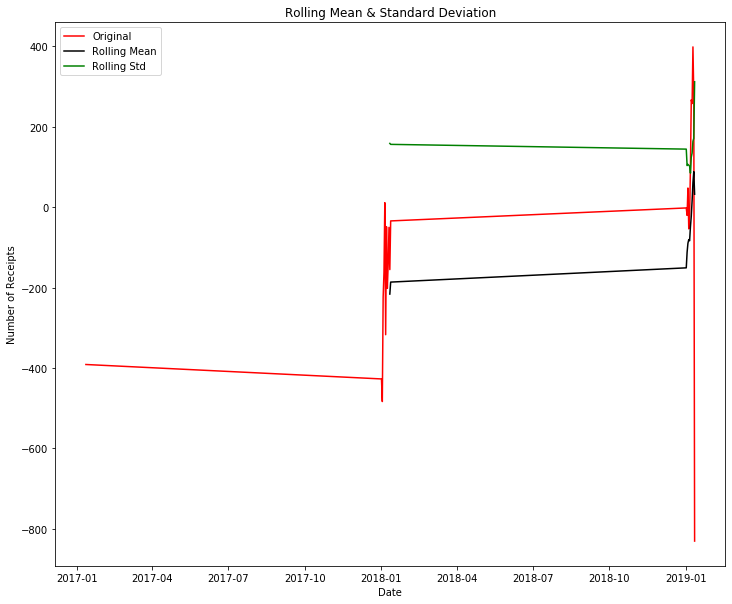

Test statistic:  6.296828141892839
p-value:  1.0
Critical Values: {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}


In [45]:
moving_avg_diff1 = min_externalaffairs_receipts - moving_avg
moving_avg_diff1.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(moving_avg_diff1)
check_adfuller(moving_avg_diff1.Receipts)

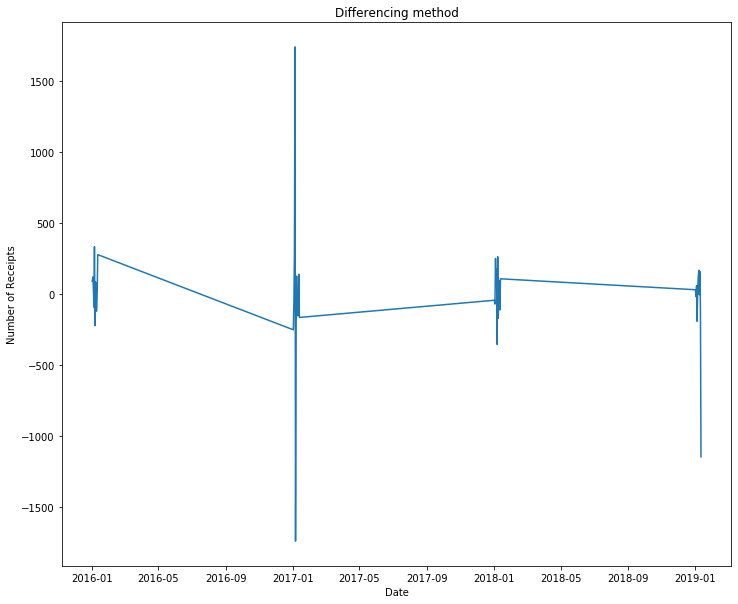

In [46]:
# differencing method
diff1 = min_externalaffairs_receipts - min_externalaffairs_receipts.shift()
plt.figure(figsize=(12,10))
plt.plot(diff1)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Number of Receipts")
plt.show()

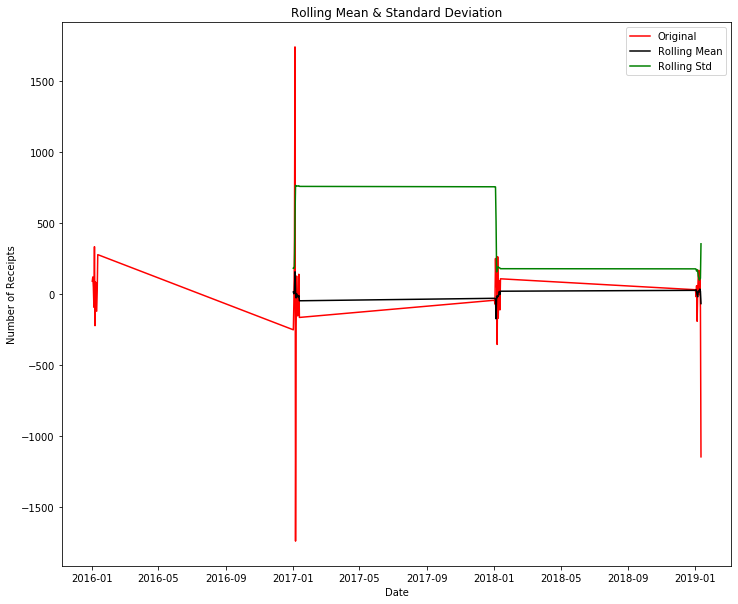

Test statistic:  -6.752330400401971
p-value:  2.9296787499967047e-09
Critical Values: {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}


In [48]:
diff1.dropna(inplace=True)
# check stationary: mean, variance(std)and adfuller test
check_mean_std(diff1)
check_adfuller(diff1["Receipts"])

E:\The Institution\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


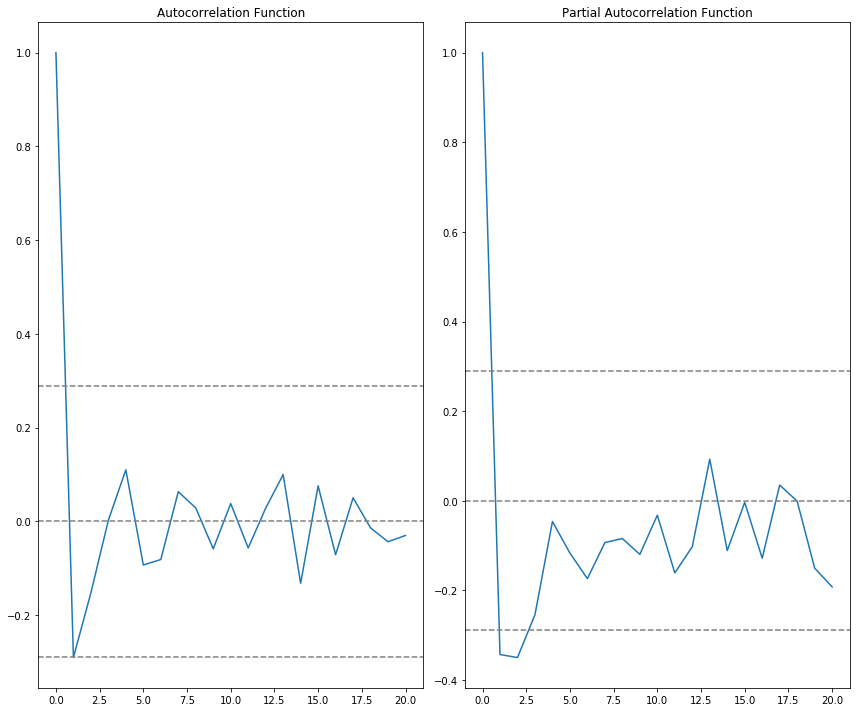

In [49]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(diff1, nlags=20)
lag_pacf = pacf(diff1, nlags=20, method='ols')
# ACF
plt.figure(figsize=(12,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


E:\The Institution\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


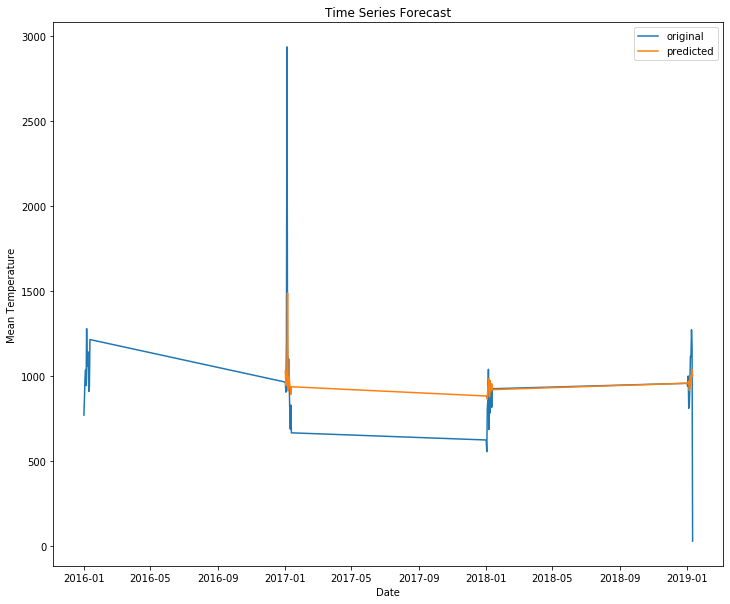

In [50]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(min_externalaffairs_receipts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(2017, 1, 1)
end_index = datetime(2019, 1, 11)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(12,10))
plt.plot(min_externalaffairs.Date,min_externalaffairs.Receipts,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()


E:\The Institution\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


error:  120830.02486974586


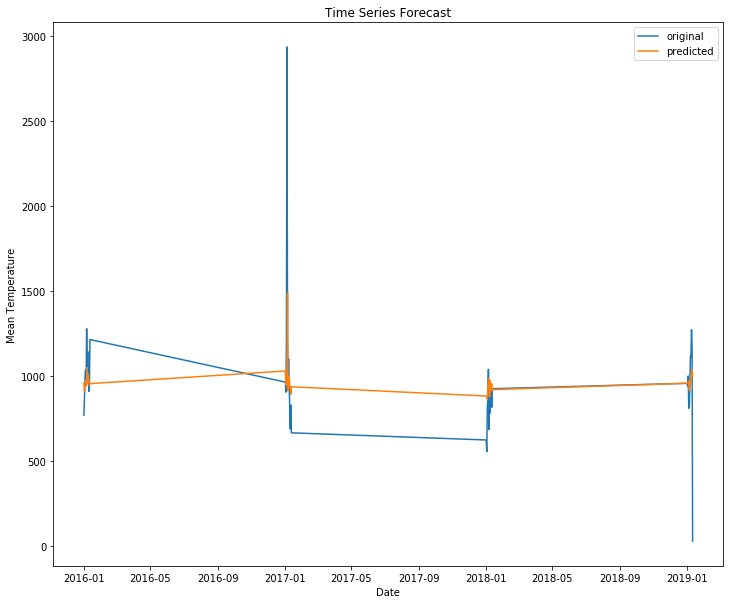

In [41]:
# predict all paths
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(min_externalaffairs_receipts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(min_externalaffairs_receipts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(12,10))
plt.plot(min_externalaffairs.Date,min_externalaffairs.Receipts,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
#plt.savefig('graph.png')

plt.show()

In [ ]:
#Do not consder after this please

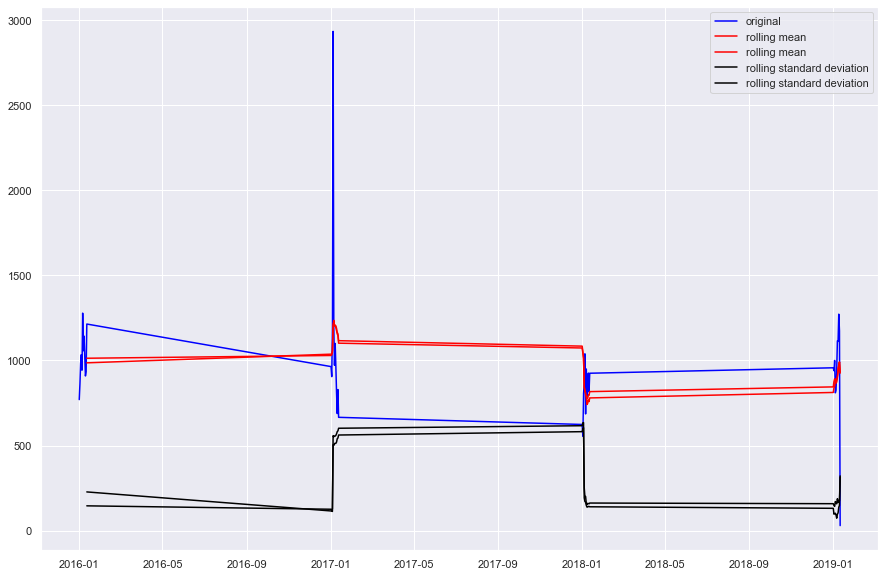

In [38]:
plt.plot(m_externalaffairs["Date"],m_externalaffairs["Receipts"], color = "blue", label = "original") 
plt.plot(m_externalaffairs["Date"],rolmean, color = "red", label = "rolling mean")
plt.plot(m_externalaffairs["Date"],rolstd, color = "black", label = "rolling standard deviation")
plt.legend()
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller Test:")
dftest1 = adfuller(m_externalaffairs_receipts["Receipts"],autolag='AIC')
dfoutput = pd.Series(dftest1[0:4], index = ["Test Statistic", "p-value","lags used","number of observations used"])
for key, value in dftest1[4].items():
    dfoutput["Critical Value(%s)"%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -4.666048
p-value                         0.000097
lags used                       0.000000
number of observations used    46.000000
Critical Value(1%)             -3.581258
dtype: float64
Test Statistic                 -4.666048
p-value                         0.000097
lags used                       0.000000
number of observations used    46.000000
Critical Value(1%)             -3.581258
Critical Value(5%)             -2.926785
dtype: float64
Test Statistic                 -4.666048
p-value                         0.000097
lags used                       0.000000
number of observations used    46.000000
Critical Value(1%)             -3.581258
Critical Value(5%)             -2.926785
Critical Value(10%)            -2.601541
dtype: float64


In [47]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(m_externalaffairs_receipts.Receipts); axes[0, 0].set_title('Original Series')
plot_acf(m_externalaffairs_receipts.Receipts, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(m_externalaffairs_receipts["Receipts"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(m_externalaffairs_receipts["Receipts"].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
#axes[2, 0].plot(m_externalaffairs_receipts.Receipts.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
#plot_acf(m_externalaffairs_receipts.Receipts.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


ValueError: view limit minimum -36853.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1080x840 with 6 Axes>

E:\The Institution\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


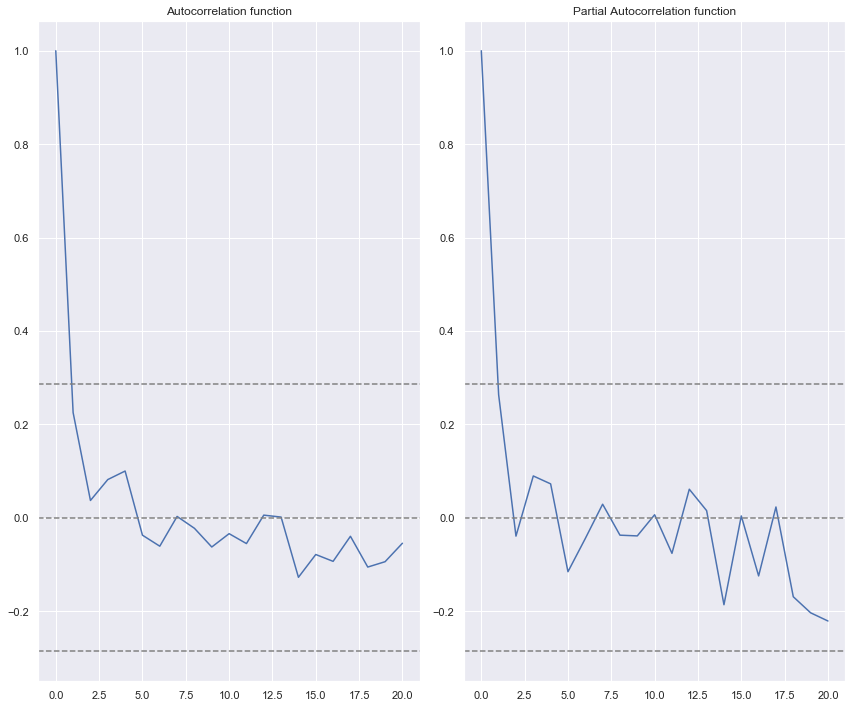

In [28]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(m_externalaffairs_receipts, nlags = 20)
lag_pacf = pacf(m_externalaffairs_receipts,nlags=20,method ='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(m_externalaffairs_receipts)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(m_externalaffairs_receipts)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(m_externalaffairs_receipts)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(m_externalaffairs_receipts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

E:\The Institution\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\The Institution\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting AR model


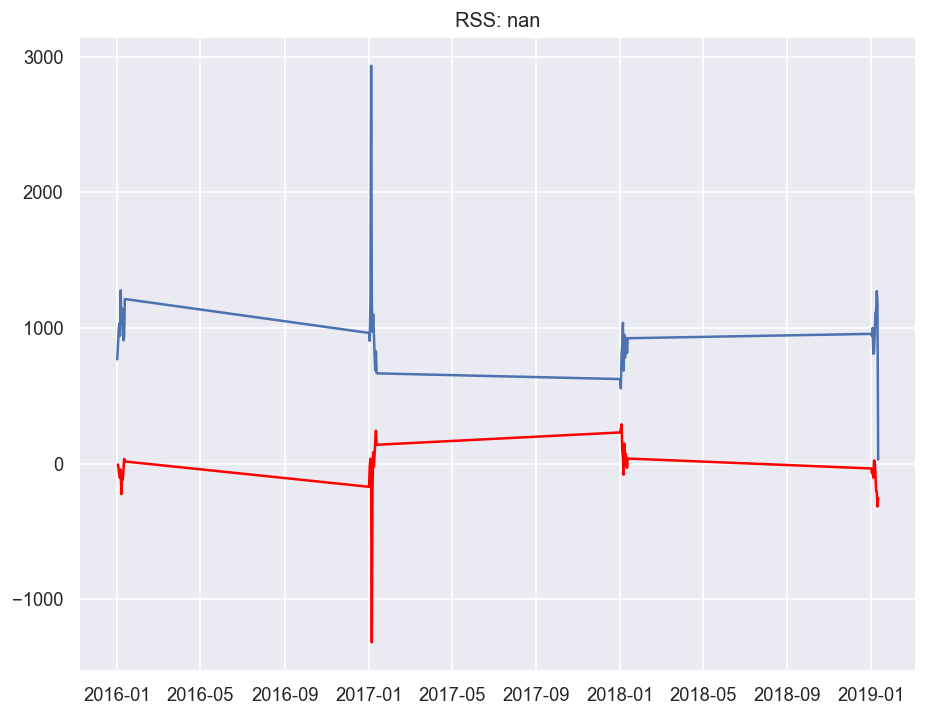

In [45]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(m_externalaffairs_receipts,order=(1,1,2))
results_AR = model.fit(disp=-1)
plt.plot(m_externalaffairs_receipts)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - m_externalaffairs_receipts["Receipts"])**2))
print('plotting AR model')

In [14]:
pendency_stats.head()

,Ministry/Department/State,Total Receipts (01.01.2016 to 01.11.2019),Total Disposal (01.01.2016 to 01.11.2019),Total Pending as on 01.11.2019,Pending More Than 1 Year,Pending Between 6 To 12 Months,Pending Between 2 To 6 Months,Pending Less Than 2 Months
0,Administrative Reforms and PG,1540,1497,43,0,0,1,42
1,Agriculture and Cooperation,21317,20557,760,7,21,141,591
2,Agriculture Research and Education,6535,6245,290,0,31,65,194
3,"Animal Husbandry, Dairying",4835,4702,133,12,16,28,77
4,Atomic Energy,5838,5279,559,346,73,59,81


In [15]:
pendency_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
Ministry/Department/State                    124 non-null object
Total Receipts (01.01.2016 to 01.11.2019)    124 non-null int64
Total Disposal (01.01.2016 to 01.11.2019)    124 non-null int64
Total Pending as on 01.11.2019               124 non-null int64
Pending More Than 1 Year                     124 non-null int64
Pending Between 6 To 12 Months               124 non-null int64
Pending Between 2 To 6 Months                124 non-null int64
Pending Less Than 2 Months                   124 non-null int64
dtypes: int64(7), object(1)
memory usage: 7.9+ KB


In [16]:
pendency_stats.describe()

,Total Receipts (01.01.2016 to 01.11.2019),Total Disposal (01.01.2016 to 01.11.2019),Total Pending as on 01.11.2019,Pending More Than 1 Year,Pending Between 6 To 12 Months,Pending Between 2 To 6 Months,Pending Less Than 2 Months
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,38545.056452,30635.120968,7909.935484,4835.258065,807.225806,953.524194,1313.927419
std,72118.883037,63377.329252,21205.176508,14684.165297,2333.919157,2350.929854,3819.736530
min,77.000000,19.000000,5.000000,0.000000,0.000000,0.000000,4.000000
25%,3765.250000,2399.500000,126.250000,0.000000,1.000000,8.000000,68.000000
50%,12712.500000,8729.500000,507.000000,12.000000,18.500000,77.500000,189.500000
75%,41319.000000,30102.000000,2063.000000,353.500000,142.500000,350.500000,1026.750000
max,547042.000000,437024.000000,112301.000000,97928.000000,18278.000000,15758.000000,37806.000000


In [17]:
nodal_officers.head()

,Apex Ministry/Dept/State,Parent of Organisation,org_code,org_name,contact_address1,contact_address2,contact_address3,pincode,pg_officer_desig,Organisation levels
0,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARCDV,DARPG ARC Division,DARPG,SP Bhawan,NaN,NaN,Deputy Secretary,2.0
1,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARDIV,AR Division,AR Division D/o ARPG 5th floor S.P. Bhavan,Sansad Marg,New Delhi,110001.0,Director,2.0
2,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARDND,D&D Division,D/of ARPG DD Division,5th Floor S.P. Bhavan Sansad Marg New Delhi,NaN,110001.0,Director,2.0
3,Department of Administrative Reforms and PG,Department of Administrative Reforms and Publi...,ARNPG,Department of Administrative Reforms and PG,5th Floor Sardar Patel Bhawan Sansad Marg New...,hi,NaN,110001.0,Deputy Secretary,1.0
4,Department of Administrative Reforms and PG,Department of Administrative Reforms and PG,ARPGA,"Admn . Div. ,Department of ARPG ,",5th floor sardar patel Bhavan,Parlaiment Street,New Delhi,110001.0,DS Admn.,2.0


In [18]:
nodal_officers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53164 entries, 0 to 53163
Data columns (total 10 columns):
Apex Ministry/Dept/State    53163 non-null object
Parent of Organisation      53149 non-null object
org_code                    53164 non-null object
org_name                    53164 non-null object
contact_address1            53161 non-null object
contact_address2            49658 non-null object
contact_address3            43574 non-null object
pincode                     40393 non-null float64
pg_officer_desig            53158 non-null object
Organisation levels         52218 non-null float64
dtypes: float64(2), object(8)
memory usage: 4.1+ MB


In [19]:
nodal_officers.describe()

,pincode,Organisation levels
count,40393.000000,52218.000000
mean,400871.372391,4.009901
std,248589.446670,1.361473
min,0.000000,0.000000
25%,131001.000000,3.000000
50%,400001.000000,4.000000
75%,600002.000000,5.000000
max,989858.000000,9.000000


In [33]:
nodal_officers.contact_address3.value_counts()

                  20981
New Delhi          1474
Mumbai              674
NEW DELHI           434
MUMBAI              414
                  ...  
Siwan                 1
Chikodi               1
DIST-CACHAR           1
Dist-Mahisagar        1
PRODDATUR             1
Name: contact_address3, Length: 7159, dtype: int64

In [36]:
nodal_officers["Apex Ministry/Dept/State"].value_counts()

Government of Haryana                         5780
Government of Gujarat                         5667
Central Board of Direct Taxes (Income Tax)    5000
Government of Assam                           4627
Government of Maharashtra                     4232
                                              ... 
National Commission for Scheduled Caste          1
Department of Internal Security                  1
Cabinet Secretariat(Rashtrapati Bhavan)          1
President's Secretariat                          1
Delhi Transco Limited                            1
Name: Apex Ministry/Dept/State, Length: 164, dtype: int64

In [57]:
registered_users.head()

,User Code,Country,State Name,District Name,Pin,Gender,Date of Registration,Time of Registration
0,1,India,Delhi,South West Delhi,110022,M,03/11/2017,18:15:15
1,2,India,Uttarakhand,Dehradun,249201,T,03/11/2017,21:01:32
2,3,India,Delhi,North Delhi,247667,M,03/11/2017,21:55:22
3,4,India,Haryana,Hisar,125001,M,03/11/2017,22:20:35
4,5,India,Delhi,North Delhi,248001,M,04/11/2017,13:31:47


In [58]:
registered_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618968 entries, 0 to 618967
Data columns (total 8 columns):
User Code               618968 non-null int64
Country                 618968 non-null object
State Name              618599 non-null object
District Name           618803 non-null object
Pin                     591863 non-null object
Gender                  618660 non-null object
Date of Registration    618968 non-null object
Time of Registration    618968 non-null object
dtypes: int64(1), object(7)
memory usage: 37.8+ MB


In [59]:
registered_users.set_index("User Code", inplace=True)

In [61]:
registered_users.head()

,Country,State Name,District Name,Pin,Gender,Date of Registration,Time of Registration
User Code,,,,,,,
1,India,Delhi,South West Delhi,110022,M,03/11/2017,18:15:15
2,India,Uttarakhand,Dehradun,249201,T,03/11/2017,21:01:32
3,India,Delhi,North Delhi,247667,M,03/11/2017,21:55:22
4,India,Haryana,Hisar,125001,M,03/11/2017,22:20:35
5,India,Delhi,North Delhi,248001,M,04/11/2017,13:31:47


In [63]:
registered_users.Gender.value_counts()

M    483814
F     66037
m     63803
f      4976
t        27
T         3
Name: Gender, dtype: int64

In [ ]:
registered_users.replace()